
Hello, My name is Guy and in this project we are going to analyze a gyms membership churn rate throguh ML prediction algorithms.



* #### <a href="#1" style="text-decoration: none; color:black">Data Import</a>
---
    
* #### <a href="#2" style="text-decoration: none; color:black">Exploratory data analysis</a>
    
* <a href="#3" style="text-decoration: none; color:black">Look at the dataset: does it contain any missing features? Study the mean values and standard deviation</a>
* <a href="#4" style="text-decoration: none; color:black">Look at the mean feature values in two groups: for those who left (churn) and for those who stayed</a>
* <a href="#5" style="text-decoration: none; color:black">Plot bar histograms and feature distributions for those who left (churn) and those who stayed.</a>
* <a href="#6" style="text-decoration: none; color:black">Build a correlation matrix and display it.</a>

---
* #### <a href="#7" style="text-decoration: none; color:black"> Build a binary classification model for customers where the target feature is the user's leaving next month.</a>
* <a href="#8" style="text-decoration: none; color:black">Divide the data into train and validation sets using the train_test_split() function.</a>
* <a href="#9" style="text-decoration: none; color:black">Train the model on the train set with two methods:
    * logistic regression 
    * random forest</a>
* <a href="#10" style="text-decoration: none; color:black">Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?</a>

---
* #### <a href="#11" style="text-decoration: none; color:black"> Create user clusters</a>
* <a href="#12" style="text-decoration: none; color:black"> Set aside the column with data on churn and identify object (user) clusters:</a>
    * <a href="#13" style="text-decoration: none; color:black">Standardize the data.</a>
    * <a href="#14" style="text-decoration: none; color:black">Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.</a>
    * <a href="#15" style="text-decoration: none; color:black">Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)</a>
    * <a href="#16" style="text-decoration: none; color:black">Look at the mean feature values for clusters. Does anything catch your eye?</a>
    * <a href="#17" style="text-decoration: none; color:black">Plot distributions of features for the clusters. Do you notice anything?</a>
    * <a href="#18" style="text-decoration: none; color:black">Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?</a>
    
    
---
* #### <a href="#19" style="text-decoration: none; color:black">Come up with conclusions and basic recommendations on working with customers</a>
* <a href="#20" style="text-decoration: none; color:black">Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.</a>


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score
import math as mth
from scipy import stats as st
import datetime
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from datetime import datetime
from IPython.display import display, HTML
from IPython.display import display_html
import warnings
import plotly.express as px
import plotly.graph_objects as go
from pylab import rcParams
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

warnings.filterwarnings("ignore")

In [2]:
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
    
    
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

<a id=1></a>
#### Data Import

In [3]:
try:
    df = pd.read_csv('/datasets/gym_churn_us.csv')
except:
    df = pd.read_csv('./gym_churn_us.csv')

In [4]:
df.columns = df.columns.str.lower()

#### Exploratory data analysis

Look at the dataset: does it contain any missing features? Study the mean values and standard deviation

In [5]:
df.shape

(4000, 14)

In [6]:
df.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [7]:
df.describe()

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Seems as the average customer is living near the gym he attends, most of them left a phone number, on average they registered for about 4.5 months membership, average age is 29.
Average customer spends about 147 on additional charges, has about 4 months untill the end of his contract, spent about 3.7 in the gym in lifetime and attends to 1-2 classes both in month and total.

In [8]:
df.describe()[:'min']

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

We dont have any missing values and it seems the distribution is fine.

Look at the mean feature values in two groups: for those who left (churn) and for those who stayed

In [10]:
churn_mean = df.groupby('churn').mean().reset_index()
churn_mean

churn    gender  near_location   partner  promo_friends     phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         5.747193      0.464103  29.976523                    158.445715   
1         1.728558      0.268615  26.989632                    115.082899   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               5.283089  4.711807                   2.024876   
1               1.662582  0.990575                   1.474995   

   avg_class_frequency_current_month  
0                           2.027882  
1                           1.044546


So for the feature means, as seen its that users that didnt churn are working or living closer to the gym, came through promo friends deals, have a higher contract period, usually go to more group sessions, have a slightly higher additional charges in total, have more time until the contract ends in term of months,have a much higher lifetime period and higher class frequency both in lifetime and monthly then for churned customers.


Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

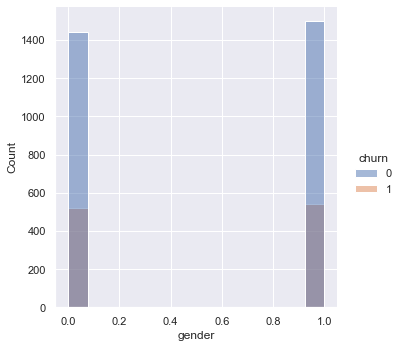

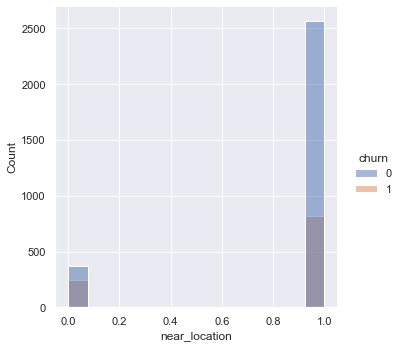

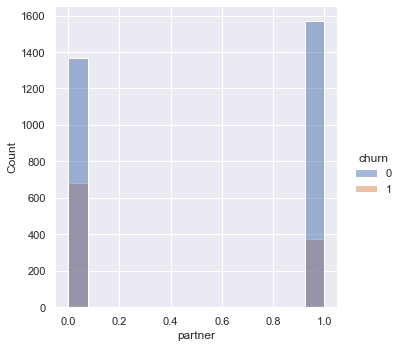

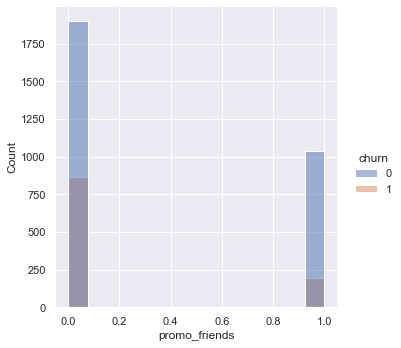

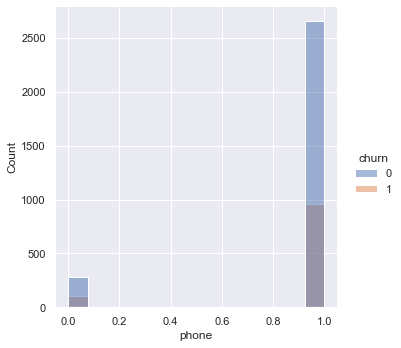

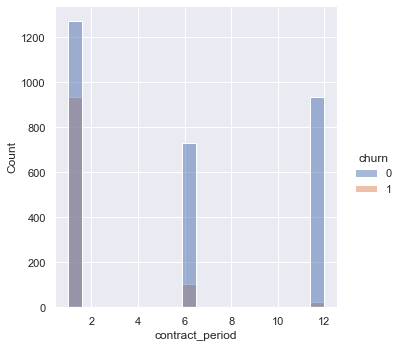

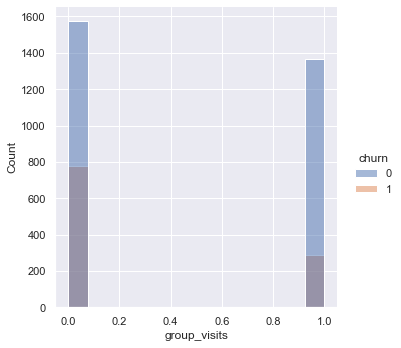

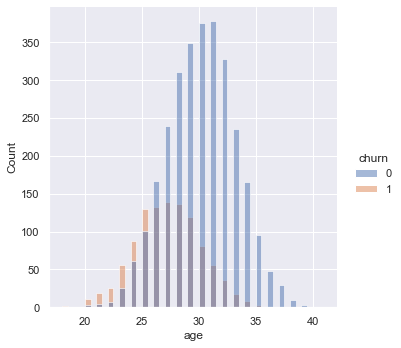

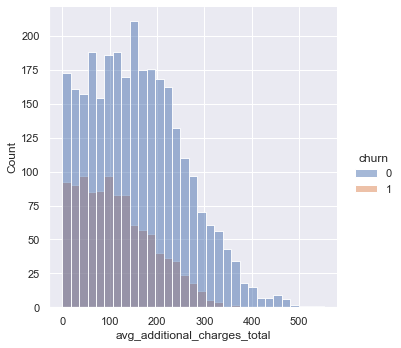

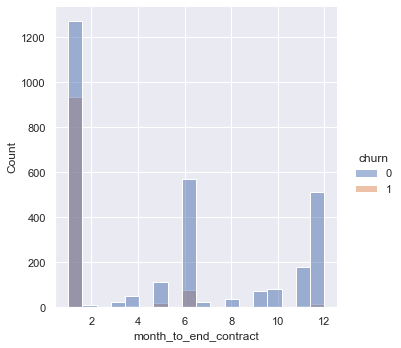

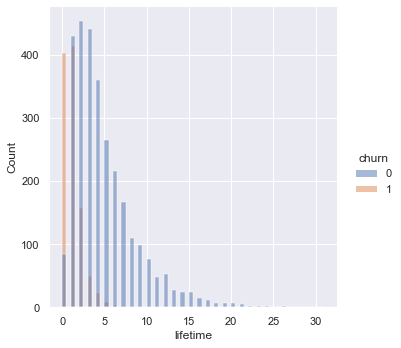

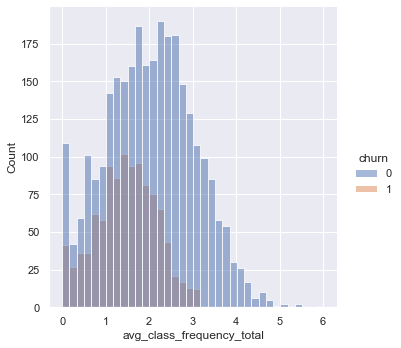

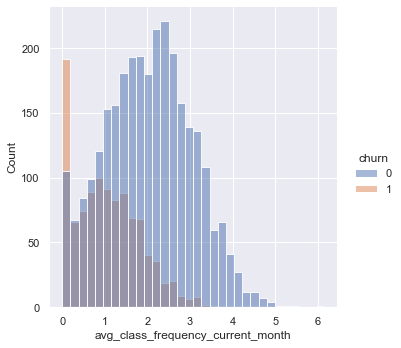

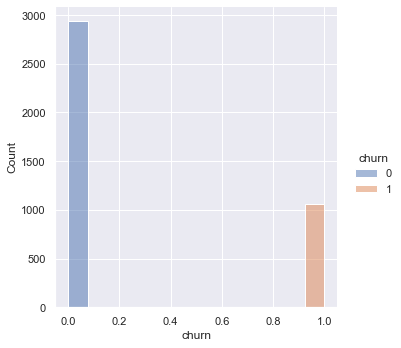

In [11]:
for col in df:
    sns.displot(df, x=col, hue='churn', kde=False)


As before the plots support our findings, the only thing wasnt seen before is the age factor, seems like younger clients tend to churn more (maybe for financial or impulsive reasons).


Build a correlation matrix and display it.

In [12]:
df.corr()

gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.045561   
churn                              0.000708      -0.128098 -0.157986   

                                   promo_friends     phone  contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
near_location                           0.210964 -0.015763         0.150233   
partner                                 0.451960  0.009970         0.306166   
promo_friends                           1.000000  0.001982         0.244552   
phone                                   0.001982  1.000000        -0.006893   
contract_period                         0.244552 -0.006893         1.000000   
group_visits                            0.120170 -0.010099         0.169991   
age                                     0.050113 -0.011403         0.138249   
avg_additional_charges_total            0.036898  0.009279         0.111445   
month_to_end_contract                   0.239553 -0.011196         0.973064   
lifetime                                0.072721 -0.018801         0.170725   
avg_class_frequency_total               0.028063  0.008340         0.096211   
avg_class_frequency_current_month       0.053768  0.013375         0.159407   
churn                                  -0.162233 -0.001177        -0.389984   

                                   group_visits       age  \
gender                                 0.017879  0.013807   
near_location                          0.154728  0.058358   
partner                                0.022710  0.047480   
promo_friends                          0.120170  0.050113   
phone                                 -0.010099 -0.011403   
contract_period                        0.169991  0.138249   
group_visits                           1.000000  0.080934   
age                                    0.080934  1.000000   
avg_additional_charges_total           0.032079  0.080240   
month_to_end_contract                  0.163703  0.134511   
lifetime                               0.075853  0.164693   
avg_class_frequency_total              0.056695  0.119953   
avg_class_frequency_current_month      0.075923  0.183095   
churn                                 -0.175325 -0.404735   

                                   avg_additional_charges_total  \
gender                                                -0.009334   
near_location                                          0.040761   
partner                                                0.022941   
promo_friends                                          0.036898   
phone                                                  0.009279   
contract_period                                        0.111445   
group_visits                                           0.032079   
age                                                    0.080240   
avg_additional_charges_total                           1.000000   
month_to_end_contract                                  0.113958   
lifetime                                               0.079028   
avg_class_frequency_total                         

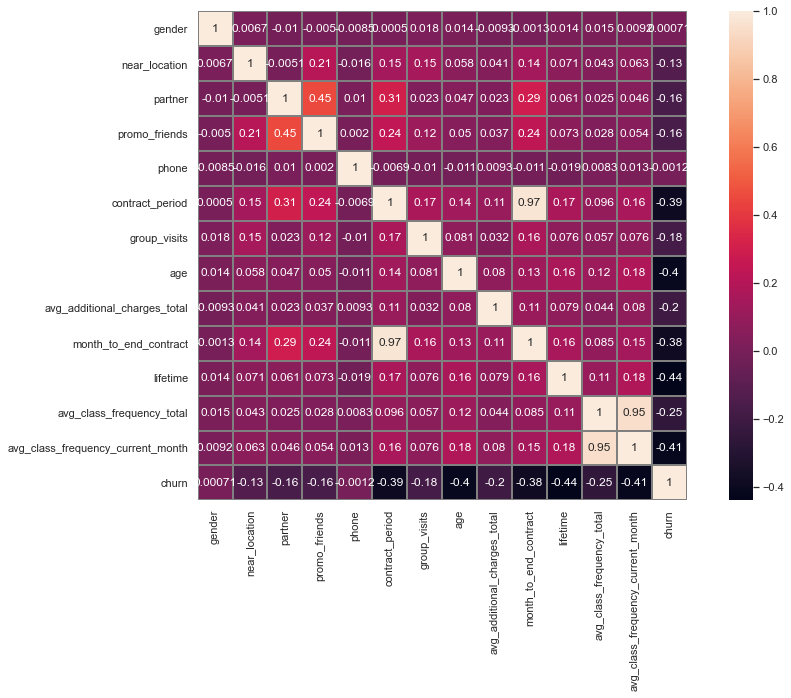

In [13]:
cm = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(cm, annot=True, square=True, linewidths=1, linecolor='gray')
plt.show();


Seems like the the most correlated features are: avg_class_frequency_current_month with avg_class_frequency_total and contract_period and month_to_end_contract.

<a id=7></a>
#### Building binary model


Divide the data into train and validation sets using the train_test_split() function.

In [14]:
X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Train the model on the train set with two methods:<br>
    * logistic regression<br>
    * random forest

In [15]:
lr_model = LogisticRegression(random_state=0)

lr_model.fit(X_train, y_train)

lr_probabilities = lr_model.predict_proba(X_test)[:,1]

lr_predictions = lr_model.predict(X_test)


print_all_metrics(y_test, lr_predictions, lr_probabilities, title = 'Metrics for Logistic regressor:')

Metrics for Logistic regressor:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.80
	F1: 0.81
	ROC_AUC: 0.96


In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


We can see that we get pretty good results from both models, with Random forest being slightly better.

Logistic Regression is the better model with slightly better accuracy (+0.01), precision(+0.02) and recall(+0.01) 

#### Building binary model

Standardize the data.

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

In [18]:
X_sc = scaler.fit_transform(X)

In [19]:
linked = linkage(X_sc, method = 'ward')

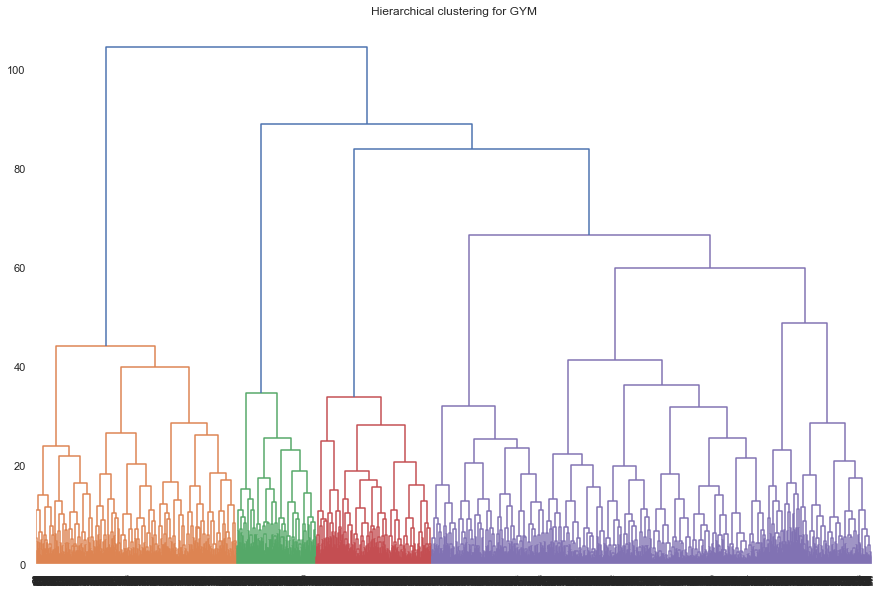

In [20]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

<div id=15>
Train the clustering model with the K-means algorithm and predict customer clusters.

In [21]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_sc)

In [22]:
df['cluster_km'] = labels

Look at the mean feature values for clusters. Does anything catch your eye?

In [23]:
clusters = df.groupby(['cluster_km']).mean().reset_index().sort_values('churn', ascending=False)
clusters.T

3           2           1  \
cluster_km                           3.000000    2.000000    1.000000   
gender                               0.485737    0.495050    0.522078   
near_location                        1.000000    0.000000    0.862338   
partner                              0.350238    0.463366    0.470130   
promo_friends                        0.240095    0.079208    0.306494   
phone                                1.000000    1.000000    0.000000   
contract_period                      1.948494    2.352475    4.787013   
group_visits                         0.341521    0.215842    0.425974   
age                                 28.167987   28.477228   29.301299   
avg_additional_charges_total       131.622204  135.457501  143.957664   
month_to_end_contract                1.856577    2.198020    4.475325   
lifetime                             2.440571    2.809901    3.924675   
avg_class_frequency_total            1.247634    1.660461    1.847220   
avg_class_frequency_current_month    1.012983    1.477324    1.716369   
churn                                0.514263    0.443564    0.267532   

                                            4           0  
cluster_km                           4.000000    0.000000  
gender                               0.559666    0.502970  
near_location                        0.976134    0.959406  
partner                              0.356802    0.783168  
promo_friends                        0.230310    0.574257  
phone                                0.998807    1.000000  
contract_period                      2.669451   10.889109  
group_visits                         0.473747    0.542574  
age                                 30.125298   29.982178  
avg_additional_charges_total       161.657905  160.761016  
month_to_end_contract                2.459427    9.954455  
lifetime                             4.898568    4.736634  
avg_class_frequency_total            2.852002    1.982055  
avg_class_frequency_current_month    2.850161    1.974789  
churn                                0.068019    0.027723

For high churn clusters (like cluster #3) we can see that the Average class frequency both for current month and total are lower then the low churn cluster (#1). we can also see notice that lower churn have more group sessions, avg additional charges(basically meaning they hang out at the gym more often), higher contract period and even more promo_friends likeness.

Plot distributions of features for the clusters. Do you notice anything?

In [24]:
sns.set_context("paper", rc={"axes.labelsize":48})
sns.pairplot(df.drop(['churn','phone'], axis=1), hue='cluster_km',palette = 'Paired',height=10, aspect=1)
plt.tight_layout();

In [25]:
silhouette_score(X_sc, labels)

0.14140953623023358

It seems that the low churn clusters that spend a lot of time in the gym(avg class freq. both month and lifetime) have a higher additional charges and vice versa.

So we have cluster 0 - 4 (5 in total), from highest churn rate to lowest are 3,2,1,4,0 as seen above.
Some mean feature values have a pattern, the lower the churn rate the higher the value of some features like avg_additional_charges_total, month_to_end_contract, lifetime  and avg_class_frequency_current_month.<br>
One thing that stands out among the lowe churn cluster (0 and 4) is that some features in cluster 4 are higher then 0 while cluster 4 has a slightly higher churn rate than 0.<br>
Some higher features are avg_class_frequency_current_month, avg_class_frequency_total (which are highly correlated with each other), higher lifetime, relativly low month_to_end_contract value, highest avg_additional_charges_total of them all and a very low contract_period (almost as the higher churn cluster).

Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [26]:
df.query('churn == 1').groupby('cluster_km')['churn'].count() / df.shape[0]*100

cluster_km
0     0.700
1     2.575
2     5.600
3    16.225
4     1.425
Name: churn, dtype: float64

the clusters that are most loyal are #3 and #2, while the more churn prone are #0 and #4.

#### Come up with conclusions and basic recommendations on working with customers

Loyal customer behaviours are seen as spending more time in the gym (more lifetime, avg freq month and total) which leads them spend extra charges (given that they are at the gym all of the time), they have longer subscriptions (10 months on average) which means they there for the long term (maybe body builders or health enthusiasts, they are more likely to participate in group sessions and most of them came through partner companies.<br>
Seems like the promo friends deal does not affect the churn rate that much as the mean feature values vary between different clusters.<br><br>

So to lower the churn rates they could make more deals similiar to the partners discounts, push more group sessions advertisment and incorporate discounts for customers who buy a long period membership.